In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Scikit-learn version:", sklearn.__version__)

Pandas version: 2.2.1
Matplotlib version: 3.8.3
Seaborn version: 0.13.2
Scikit-learn version: 1.4.1.post1


In [3]:
df = pd.read_csv("medical_insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [5]:
print(f"shape of the dataframe: {df.shape}")

shape of the dataframe: (2772, 7)


In [6]:
# Checking summary statistics for numerical columns with an intention to understand central tendency, dispersion, and distribution
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
               age          bmi     children       charges
count  2772.000000  2772.000000  2772.000000   2772.000000
mean     39.109668    30.701349     1.101732  13261.369959
std      14.081459     6.129449     1.214806  12151.768945
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.220000     0.000000   4687.797000
50%      39.000000    30.447500     1.000000   9333.014350
75%      51.000000    34.770000     2.000000  16577.779500
max      64.000000    53.130000     5.000000  63770.428010


## Summary Statistics:
- **Count**:There are 2,772 records in the dataset.
- **Mean Age**: The average age of the individuals in the dataset is approximately 39.1 years.
- **BMI**: The average Body Mass Index (BMI) is around 30.7, indicating an average level of overweight.
- **Children**: On average, individuals have about 1.1 children.
- **Charges**: The average medical insurance cost is approximately $13,261.37.

2. Standard Deviation (Std):

- **Age**: The standard deviation of age is about 14.1 years, indicating a spread around the mean.
- **BMI**: The standard deviation of BMI is approximately 6.1, showing variability in BMI across individuals.
- **Children**: The standard deviation of the number of children is about 1.2, indicating variability.
- **Charges**: The standard deviation of medical insurance costs is approximately $12,151.77, showing a wide range of charges.

3. Minimum (Min):

- **Age**: The youngest individual in the dataset is 18 years old.
- **BMI**: The lowest BMI in the dataset is 15.96.
- **Children**: Some individuals have no children (minimum is 0).
- **Charges**: The lowest medical insurance cost is $1,121.87.

4. 25th Percentile (Q1):

- **Age**: 25% of individuals are 26 years old or younger.
- **BMI**: 25% of individuals have a BMI of 26.22 or lower.
- **Children**: 25% of individuals have no children.
- **Charges**: 25% of medical insurance costs are $4,687.80 or lower.

5. 50th Percentile (Median) (Q2):

- **Age**: 50% of individuals are 39 years old or younger.
- **BMI**: The median BMI is 30.45, meaning half of the individuals have a BMI higher than this value.
- **Children**: Half of the individuals have one child or less.
- **Charges**: Half of the medical insurance costs are $9,333.01 or lower.

6. 75th Percentile (Q3):

- **Age**: 75% of individuals are 51 years old or younger.
- **BMI**: 75% of individuals have a BMI of 34.77 or lower.
- **Children**: 75% of individuals have two children or fewer.
- **Charges**: 75% of medical insurance costs are $16,577.78 or lower.

7. Maximum (Max):

- **Age**: The oldest individual in the dataset is 64 years old.
- **BMI**: The highest BMI in the dataset is 53.13.
- **Children**: The maximum number of children in the dataset is 5.
- **Charges**: The highest medical insurance cost is $63,770.43.

In [7]:
# Check for missing values
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
print(f"Number of unique values across columns: \n{df.nunique()}")

Number of unique values across columns: 
age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [9]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


- In this dataset, we are not checking for duplicates because there could be multiple patients with the same age, sex, BMI, number of children, smoker status, region, and even medical charges. 

- Each row represents a unique patient and their associated medical insurance information. Since patients can have the same attributes but different medical charges, it's expected that there will be many rows with similar or even identical values across all columns.

- Checking for duplicates in this context might not yield meaningful results. Even if two rows have identical values in all columns, they could represent two different patients with the same characteristics but different medical charges.

In [10]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'charges']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [11]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


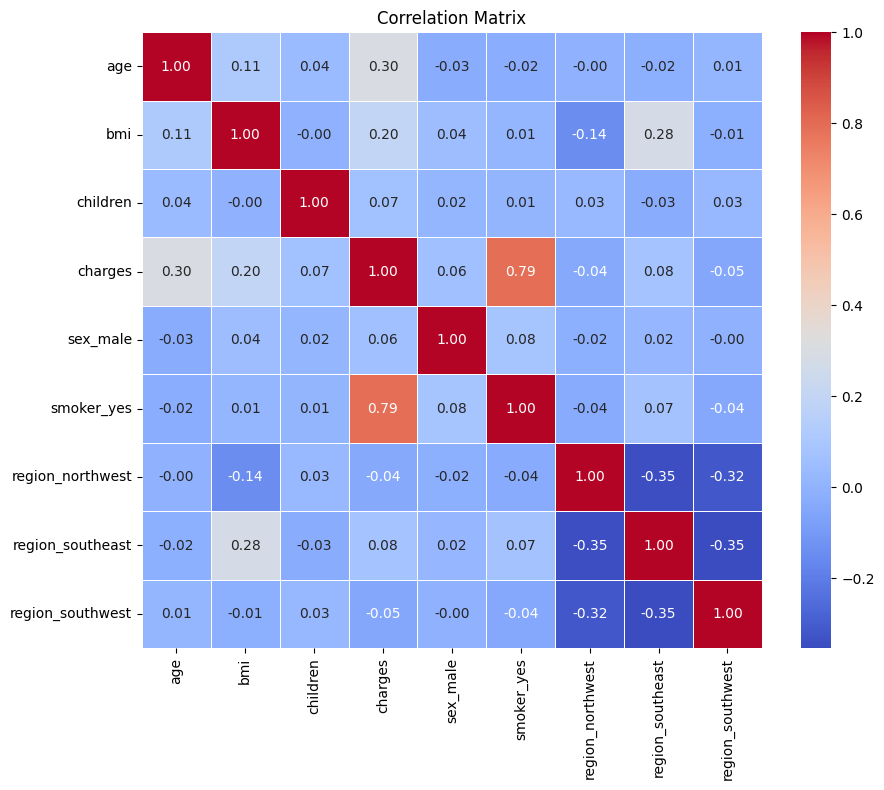

In [12]:
# Columns: 'sex', 'smoker', and 'region' have non-numeric data and need to converted into numeric data so that we can compute our correlation matrix.
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Correlation matrix
correlation_matrix = df_encoded.corr()

# Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Key Points:
1. Age and Charges:

- There is a positive correlation of about 0.30 between 'age' and 'charges'. This indicates that as age increases, medical charges tend to increase as well, though the correlation is not extremely strong.

2. BMI and Charges:

- There is a positive correlation of about 0.20 between 'bmi' and 'charges'. This suggests that individuals with higher BMI values tend to have higher medical insurance charges, but again, the correlation is moderate.

3. Smoker and Charges:

- There is a strong positive correlation of about 0.79 between 'smoker' and 'charges'. This is a significant correlation, suggesting that being a smoker is strongly associated with higher medical insurance charges in this dataset.

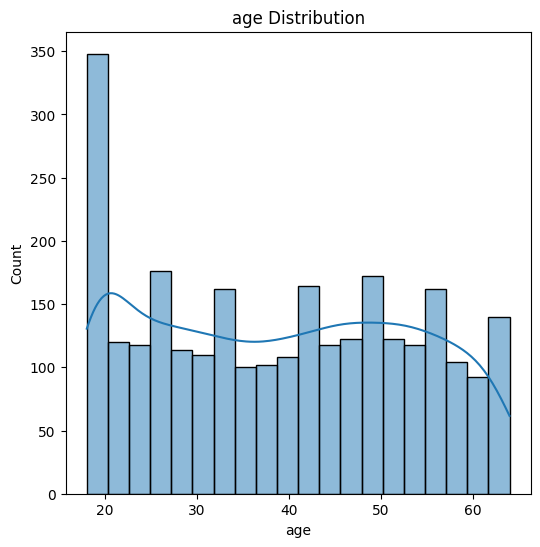

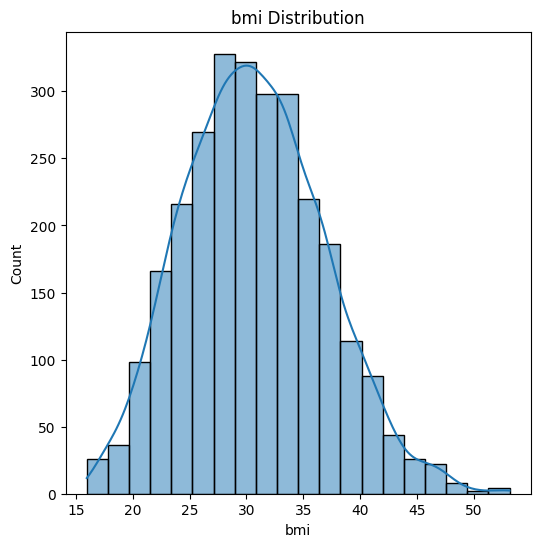

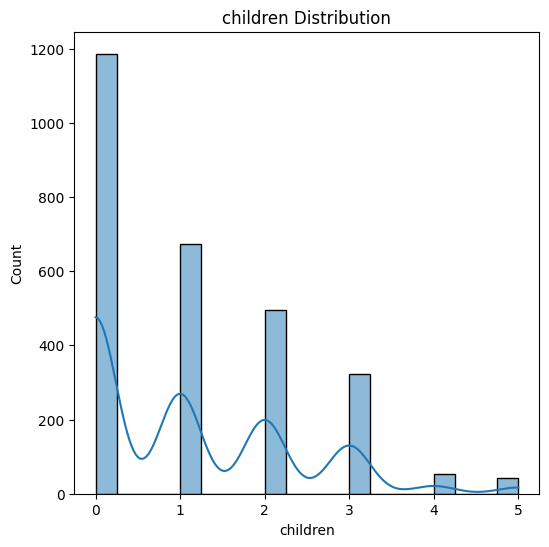

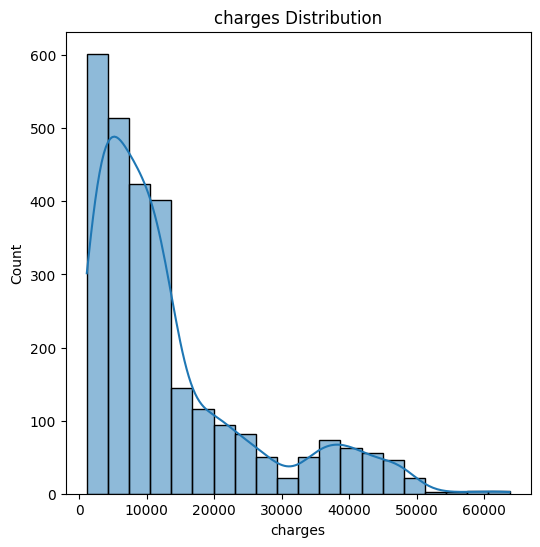

In [13]:
# Plotting histograms to check the distribution of numerical columns just to get a general idea of how the data is distributed.
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(6, 6))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col + " Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

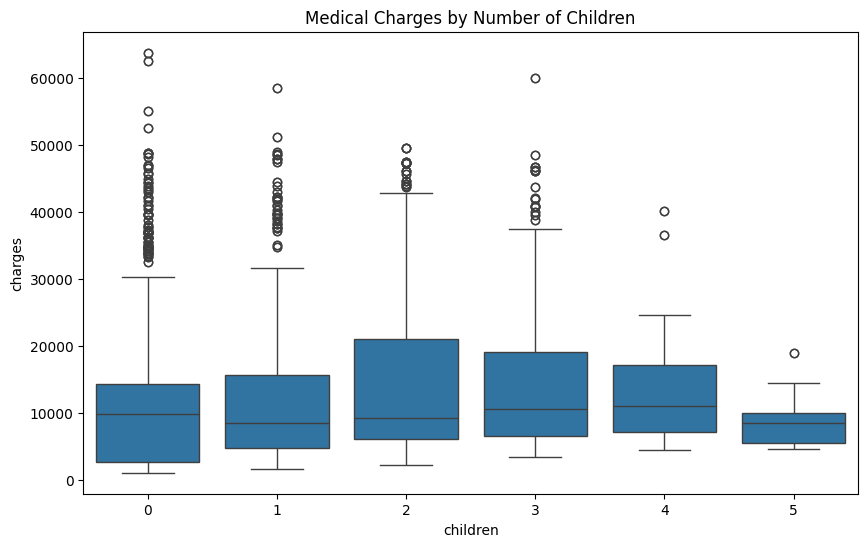

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Medical Charges by Number of Children')
plt.show()

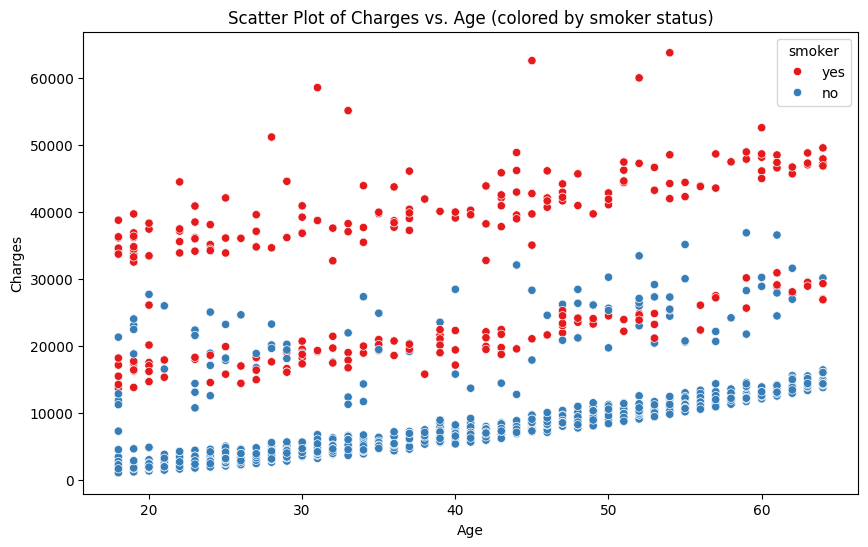

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, palette='Set1')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Scatter Plot of Charges vs. Age (colored by smoker status)')
plt.show()

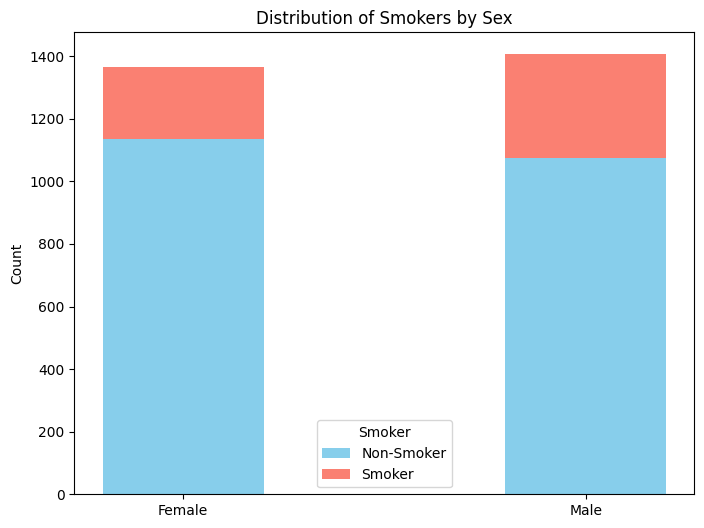

In [20]:
# Count the number of smokers and non-smokers for each sex
female_counts = df[df['sex'] == 'female']['smoker'].value_counts()
male_counts = df[df['sex'] == 'male']['smoker'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
bar_width = 0.4

# Female bars
plt.bar(x='Female', height=female_counts[0], width=bar_width, color='skyblue', label='Non-Smoker')
plt.bar(x='Female', height=female_counts[1], width=bar_width, color='salmon', bottom=female_counts[0], label='Smoker')

# Male bars
plt.bar(x='Male', height=male_counts[0], width=bar_width, color='skyblue')
plt.bar(x='Male', height=male_counts[1], width=bar_width, color='salmon', bottom=male_counts[0])

# Customizing the plot
plt.ylabel('Count')
plt.title('Distribution of Smokers by Sex')
plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])

plt.show()

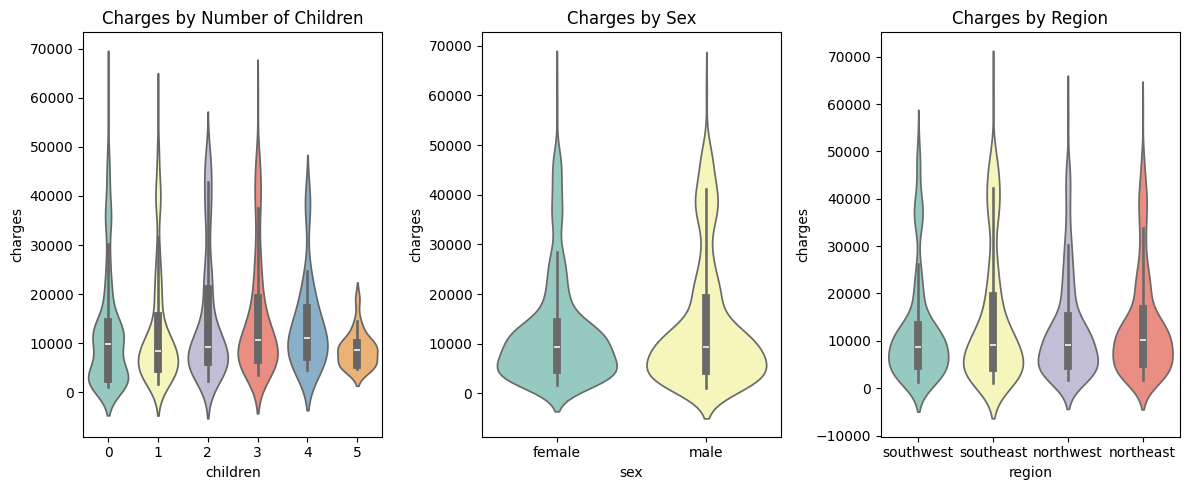

In [22]:
# Violin plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.violinplot(x='children', y='charges', data=df, palette='Set3')
plt.title('Charges by Number of Children')

plt.subplot(1, 3, 2)
sns.violinplot(x='sex', y='charges', data=df, palette='Set3')
plt.title('Charges by Sex')

plt.subplot(1, 3, 3)
sns.violinplot(x='region', y='charges', data=df, palette='Set3')
plt.title('Charges by Region')
plt.tight_layout()
plt.show()

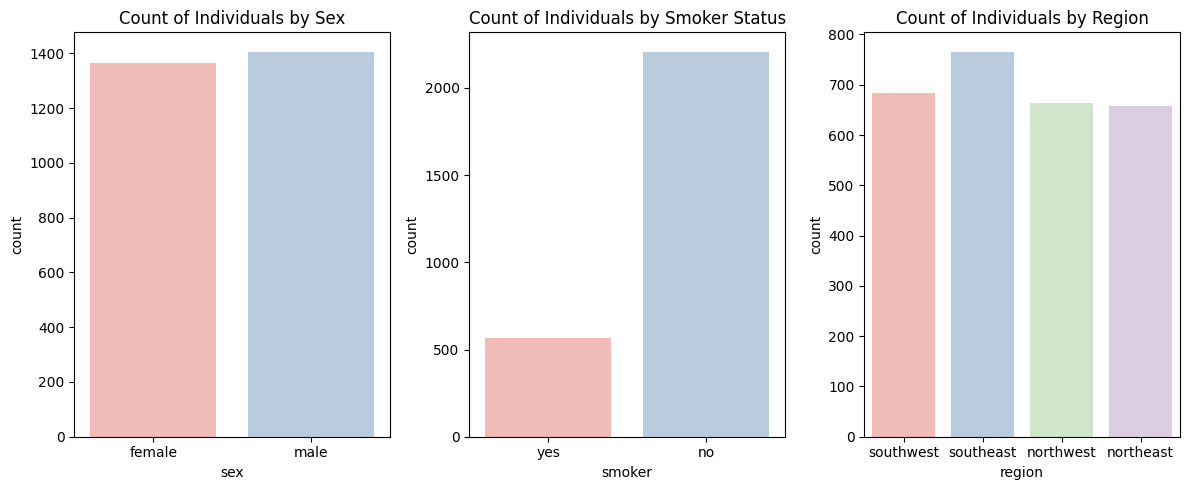

In [24]:
# Bar plots for categorical variables
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df, palette='Pastel1')
plt.title('Count of Individuals by Sex')

plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df, palette='Pastel1')
plt.title('Count of Individuals by Smoker Status')

plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df, palette='Pastel1')
plt.title('Count of Individuals by Region')
plt.tight_layout()
plt.show()